<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Remove-Unnecessary-Columns" data-toc-modified-id="Remove-Unnecessary-Columns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Remove Unnecessary Columns</a></span></li><li><span><a href="#Null-value" data-toc-modified-id="Null-value-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Null value</a></span><ul class="toc-item"><li><span><a href="#Null-values" data-toc-modified-id="Null-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Null values</a></span><ul class="toc-item"><li><span><a href="#percentage-of-the-missing-values-in-the-coulumn" data-toc-modified-id="percentage-of-the-missing-values-in-the-coulumn-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>percentage of the missing values in the coulumn</a></span><ul class="toc-item"><li><span><a href="#its-better-to-remove-the-columns-because-it-has-near-about-42%-data-missing." data-toc-modified-id="its-better-to-remove-the-columns-because-it-has-near-about-42%-data-missing.-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>its better to remove the columns because it has near about 42% data missing.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Multivariate-Analysis" data-toc-modified-id="Multivariate-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multivariate Analysis</a></span></li><li><span><a href="#Working-with-target-variable" data-toc-modified-id="Working-with-target-variable-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Working with target variable</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Encoding</a></span></li></ul></div>

In [78]:
!pip install --upgrade scikit-learn==1.3.1

# Import Libraries

In [79]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pickle


In [80]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)



Scikit-learn version: 1.3.1


# Import Dataset

In [81]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\SB\Productivity Prediction\Data\garments_worker_productivity.csv")

In [82]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [83]:
df.shape

(1197, 15)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# EDA

In [85]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [86]:
df.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [87]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [88]:
df.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [89]:
df.department.value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [90]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [91]:
lambda x:'finishing' if  x=='finishing ' else x

<function __main__.<lambda>(x)>

In [92]:
df['department']=df['department'].apply(lambda x:'finishing' if  x=='finishing ' else x)

In [93]:
df.department.value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [94]:
df.department.unique()

array(['sweing', 'finishing'], dtype=object)

## Remove Unnecessary Columns

In [95]:
df.drop('date',axis=1,inplace=True)

In [96]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

## Null value

### Null values

#### percentage of the missing values in the coulumn

In [97]:
df.isnull().mean()*100

quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

##### its better to remove the columns because it has near about 42% data missing.

In [98]:
df1=df.drop(['wip'],axis=1)

In [99]:
df1.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

## Univariate Analysis

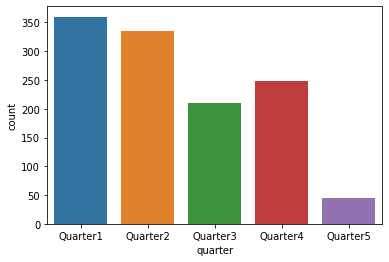

In [100]:
sns.countplot(x='quarter',data=df1)
plt.show()

__conclusion:__  Quarter1 and Quarter2 almost have long duration

In [101]:
df.quarter.value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

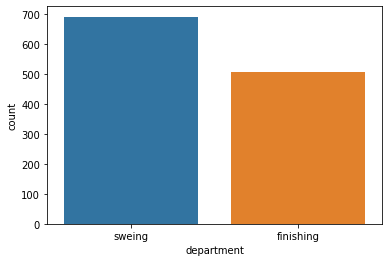

In [102]:
sns.countplot(x='department',data=df1)
plt.show()

__Conclusion__ :  Sweing department have greater employee than finishing deparment

<Axes: xlabel='over_time', ylabel='Density'>

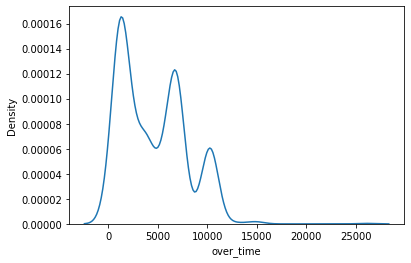

In [103]:
sns.kdeplot('over_time',data=df1)

__Conclusion:__ Very least Employee done Overtime

In [104]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

<Axes: xlabel='incentive', ylabel='Density'>

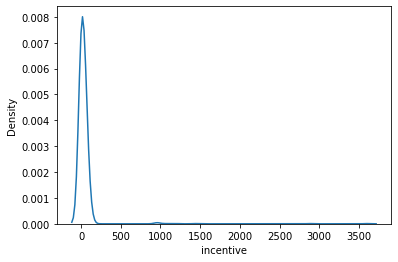

In [105]:
sns.kdeplot('incentive',data=df1)

__Conclusion:__ almost no Employee get incentives

<Axes: xlabel='smv', ylabel='Density'>

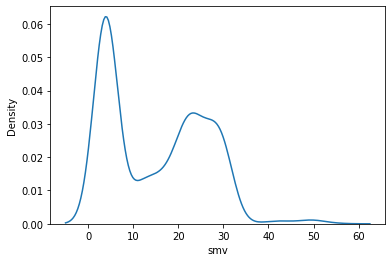

In [106]:
sns.kdeplot('smv',data=df1)

## Bivariate Analysis

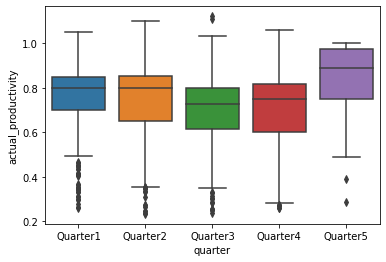

In [107]:
sns.boxplot(x='quarter',y='actual_productivity',data=df1)
plt.show()

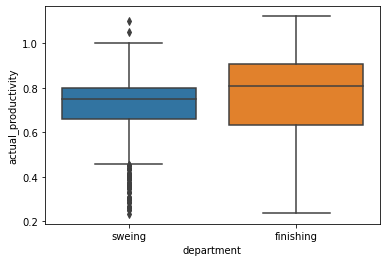

In [108]:
sns.boxplot(x='department',y='actual_productivity',data=df1)
plt.show()

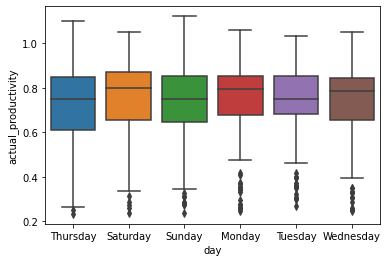

In [109]:
sns.boxplot(x='day',y='actual_productivity',data=df1)
plt.show()

## Multivariate Analysis

In [110]:
df1.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

<Axes: >

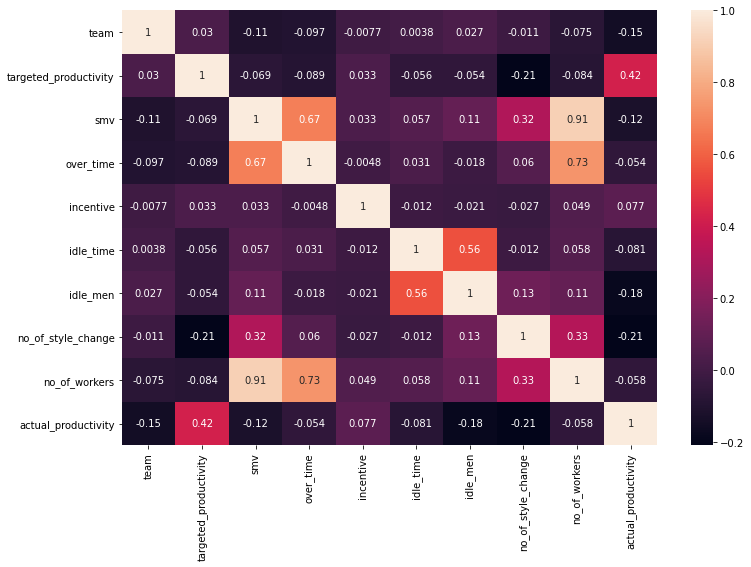

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(df1[[ 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']].corr(),annot=True)

## Working with target variable

  As want to convert this problem to classification we will fix the  threshold for the probability and convert it into the 1 for for perticuler team is productive and 0 for not productive

In [112]:
df1.actual_productivity.describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

In [113]:
df1[df1.actual_productivity>1].shape

(37, 13)

In [114]:
df1['actual_productivity']=df1['actual_productivity'].apply(lambda x: 1 if x>1 else x)

In [115]:
df1[df1.actual_productivity>1]

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [116]:
df1['actual_productivity']=df1['actual_productivity'].apply(lambda x: 1 if x>0.75 else 0)

In [117]:
df1['actual_productivity'].value_counts()

actual_productivity
1    716
0    481
Name: count, dtype: int64

# Model Building

In [118]:
df1

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0


In [119]:
df1[(df1.actual_productivity<0.75)].shape

(481, 13)

In [120]:
X=df1.drop('actual_productivity',axis=1)
Y=df1[['actual_productivity']]
Y = np.ravel(Y)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [123]:
X_train

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
12,Quarter1,sweing,Thursday,5,0.80,11.41,3660,50,0.0,0,0,30.5
660,Quarter2,finishing,Sunday,1,0.80,3.94,1200,0,0.0,0,0,10.0
403,Quarter4,sweing,Saturday,10,0.75,22.52,10080,69,0.0,0,0,56.0
1126,Quarter2,finishing,Sunday,10,0.70,2.90,960,0,0.0,0,0,8.0
192,Quarter2,sweing,Sunday,5,0.60,20.79,7980,0,0.0,0,0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30,Quarter1,sweing,Saturday,6,0.80,25.90,6720,50,0.0,0,0,56.0
956,Quarter4,finishing,Thursday,2,0.70,3.90,960,0,0.0,0,0,8.0
700,Quarter2,sweing,Tuesday,12,0.80,15.26,4080,50,0.0,0,0,34.0
150,Quarter2,finishing,Saturday,4,0.80,3.94,6000,0,0.0,0,0,20.0


In [124]:
X_train.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'],
      dtype='object')

In [125]:
X_train.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,6.421108,0.731160,15.090104,4632.763845,36.559039,0.904389,0.425287,0.155695,34.857889
std,3.445829,0.096839,10.842889,3353.250954,162.990925,14.209193,3.564397,0.433678,22.191450
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,51.020000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


In [126]:
X_train.day.unique()

array(['Thursday', 'Sunday', 'Saturday', 'Tuesday', 'Wednesday', 'Monday'],
      dtype=object)

## Encoding

In [127]:
df1.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity'],
      dtype='object')

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [129]:

categorical_cols = ['quarter', 'department', 'day']  # Replace with your actual column names

# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False,drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Include the non-categorical columns as they are
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [130]:
import pickle
# Save the model to a file
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [131]:
X_test_transformed

array([[ 0.,  1.,  0., ...,  0.,  0., 57.],
       [ 0.,  0.,  1., ...,  0.,  0., 57.],
       [ 1.,  0.,  0., ...,  0.,  0.,  8.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0., 56.],
       [ 0.,  1.,  0., ...,  0.,  0., 57.],
       [ 1.,  0.,  0., ...,  0.,  1., 52.]])

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
 
# Train the classifier
rf_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_transformed)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        95
           1       0.85      0.91      0.88       145

    accuracy                           0.85       240
   macro avg       0.85      0.83      0.84       240
weighted avg       0.85      0.85      0.85       240



In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_transformed)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.45      0.55        95
           1       0.71      0.87      0.78       145

    accuracy                           0.70       240
   macro avg       0.70      0.66      0.66       240
weighted avg       0.70      0.70      0.69       240



In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score

# Create a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.8125
Precision: 0.8122


In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

# Create a KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.7208
Precision: 0.7178


In [136]:
y_pred 

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [138]:

models=[]
models.append(("RF",RandomForestClassifier()))
models.append(("LR",LogisticRegression(solver="liblinear",multi_class="ovr")))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVC",SVC(gamma='auto')))
models.append(("GB", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)))



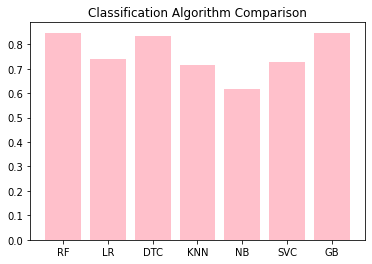

,name,Cross_Val_score,Cross_sd,Acc_score,Error,Precision,Recall,f1 score
0,RF,0.845351,0.026685,0.850000,0.150000,0.849554,0.850000,0.849716
1,LR,0.739836,0.034935,0.712500,0.287500,0.708127,0.712500,0.703265
2,DTC,0.835987,0.034122,0.800000,0.200000,0.800807,0.800000,0.800347
3,KNN,0.714726,0.037907,0.720833,0.279167,0.717770,0.720833,0.710762
4,NB,0.617500,0.020902,0.612500,0.387500,0.617188,0.612500,0.493559
5,SVC,0.729364,0.037815,0.725000,0.275000,0.735912,0.725000,0.703374
6,GB,0.847511,0.049422,0.829167,0.170833,0.829499,0.829167,0.829318


In [139]:
names=[]
results=[]
res=[]
Acc_score=[]
cross_sd=[]
Pre_score=[]
Rec_score=[]
F1=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=None)
    cv_result=cross_val_score(model,X_train_transformed,y_train,cv=kfold,scoring='accuracy')
    y_pred=model.fit(X_train_transformed,y_train).predict(X_test_transformed)
    acc_score=accuracy_score(y_test,y_pred)
    pre_score=precision_score(y_test,y_pred,average='weighted')
    rec_score=recall_score(y_test,y_pred,average='weighted')
    f1=f1_score(y_test,y_pred,average='weighted')
    results.append(cv_result)
    res.append(cv_result.mean())
    cross_sd.append(cv_result.std())
    Acc_score.append(acc_score)
    Pre_score.append(pre_score)
    Rec_score.append(rec_score)
    F1.append(f1)
    names.append(name)
pd.DataFrame({"name":names,'Accuracy_score':res})
models=[]
models.append(("RF",RandomForestClassifier()))
models.append(("LR",LogisticRegression(solver="liblinear",multi_class="ovr")))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVC",SVC(gamma='auto')))
models.append(("GB", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)))


plt.bar(names,res,color='pink')
plt.title("Classification Algorithm Comparison")
plt.show()
pd.DataFrame({"name":names,'Cross_Val_score':res,"Cross_sd":cross_sd,"Acc_score":Acc_score,"Error": 1 - pd.Series(Acc_score),"Precision":Pre_score,"Recall":Rec_score,'f1 score':F1})


# Hyperparameter Tunning of best model

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]  # Add 'None' as a valid option
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-packages\s

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy with Best Hyperparameters: 0.8416666666666667


# Best Model

In [141]:
  final_model1=RandomForestClassifier(max_depth= 10, max_features= None, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50)

In [142]:
final_model1.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50)

In [143]:
y_pred_f=final_model1.predict(X_test_transformed)


In [144]:
report=classification_report(y_test,y_pred_f)

In [145]:
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        95
           1       0.86      0.88      0.87       145

    accuracy                           0.84       240
   macro avg       0.84      0.83      0.83       240
weighted avg       0.84      0.84      0.84       240



# Save Model

In [146]:
import pickle

In [147]:
import pickle
# Save the model to a file
with open('final_model1.pkl', 'wb') as file:
    pickle.dump(final_model1, file)

In [148]:
print("Scikit-learn version:", sklearn.__version__)

    

Scikit-learn version: 1.3.1


In [160]:
loaded_preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
loaded_model = pickle.load(open('final_model1.pkl', 'rb'))


In [156]:
data = {
    'quarter': ['Quarter1'],
    'department': ['finishing'],
    'day': ['Sunday'],
    'team': [2],
    'targeted_productivity': [0.3],
    'smv': [3],
    'over_time': [5],
    'incentive': [33],
    'idle_time': [2],
    'idle_men': [2],
    'no_of_style_change': [2],
    'no_of_workers': [2]}


In [153]:
X_train.day.unique()

array(['Thursday', 'Sunday', 'Saturday', 'Tuesday', 'Wednesday', 'Monday'],
      dtype=object)

In [155]:
X_train.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers'],
      dtype='object')

In [157]:
data=pd.DataFrame(data)

In [162]:
# Transform the input data using the loaded preprocessor
processed_data = loaded_preprocessor.transform(data)

# Make predictions using the loaded model
predictions = loaded_model.predict(processed_data)

In [164]:
predictions[0]

1

In [165]:
processed_data

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  2. ,
         0.3,  3. ,  5. , 33. ,  2. ,  2. ,  2. ,  2. ]])